# Exploratory Data Analysis in Professional Basketball

In this project we will conduct an exploratory data analysis of professional basketball data.  Basketball is a team sport in which the goal is to try to outscore the amount in a fixed amount of time. Points are scored (either 2 or 3 points) by putting the ball throw a hoop on one end of the court.  An attempt at putting the ball throw the hoop is known as a "shot".  If helpful, you can read more about [the rules of basketball](https://en.wikipedia.org/wiki/Rules_of_basketball).

The National Basketball Association (NBA) is the professional basketball league in the United States and provides a nice website with many statistics gathered on teams and players in the league: [http://stat.nba.com](http://stat.nba.com). 

<!-- BEGIN QUESTION -->

## Managing data files

We will use data that is available from NBA. Although NBA doesn't officially make the data API (application programming interface) public, people have figured out ways to access their data programmatically ([1](https://github.com/swar/nba_api), [2](https://github.com/seemethere/nba_py/wiki/stats.nba.com-Endpoint-Documentation)). However, NBA does not offer an official API and it is possible to get our JupyterHub blocked by the site if we use them. Therefore, in this assignment, the raw data downloads are provided to you in a zip file: https://ucsb.box.com/shared/static/z6y3etgikbzbnf0ld4brvc95xtgjcrie.zip

```bash
wget -nc https://ucsb.box.com/shared/static/z6y3etgikbzbnf0ld4brvc95xtgjcrie.zip -O nba-data.zip
unzip -o nba-data.zip -d data
```

<!-- END QUESTION -->

After unzipping the files, there are three types of files in `data/` directory:

* Team data: `commonTeamYears?LeagueID=00&Season=2018-19`
* Player data: `commonallplayers?LeagueID=00&Season=2018-19&IsOnlyCurrentSeason=0`
* Player's shot data: `shotchartdetail?PlayerID=[PlayerID]&PlayerPosition=&Season=2018-19&ContextMeasure=FGA&DateFrom=&DateTo=&GameID=&GameSegment=&LastNGames=0&LeagueID=00&Location=&Month=0&OpponentTeamID=0&Outcome=&Period=0&Position=&RookieYear=&SeasonSegment=&`

Each player's shot data is identified by replacing `[PlayerID]` with their numeric ID.

Another way to unzip a file is using `zipfile`.

In [13]:
import zipfile
with zipfile.ZipFile('nba-data.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

### Team Data

Read team data file into a pandas data frame named `allteams`

In [14]:
from pathlib import Path
import json
import pandas as pd
import numpy as np

fname  = 'data/commonTeamYears?LeagueID=00&Season=2018-19' # directory_name/file_name
step_1 = Path(fname).read_text()              # str
step_2 = json.loads(step_1)                   # dict
step_3 = step_2['resultSets'][0]['rowSet']    # list 
step_4 = step_2['resultSets'][0]['headers']   # list

In [16]:
print(step_1)
print(step_2)
print(step_3)
print(step_4)

{"resource":"commonteamyears","parameters":{"LeagueID":"00"},"resultSets":[{"name":"TeamYears","headers":["LEAGUE_ID","TEAM_ID","MIN_YEAR","MAX_YEAR","ABBREVIATION"],"rowSet":[["00",1610612737,"1949","2019","ATL"],["00",1610612738,"1946","2019","BOS"],["00",1610612740,"2002","2019","NOP"],["00",1610612741,"1966","2019","CHI"],["00",1610612742,"1980","2019","DAL"],["00",1610612743,"1976","2019","DEN"],["00",1610612745,"1967","2019","HOU"],["00",1610612746,"1970","2019","LAC"],["00",1610612747,"1948","2019","LAL"],["00",1610612748,"1988","2019","MIA"],["00",1610612749,"1968","2019","MIL"],["00",1610612750,"1989","2019","MIN"],["00",1610612751,"1976","2019","BKN"],["00",1610612752,"1946","2019","NYK"],["00",1610612753,"1989","2019","ORL"],["00",1610612754,"1976","2019","IND"],["00",1610612755,"1949","2019","PHI"],["00",1610612756,"1968","2019","PHX"],["00",1610612757,"1970","2019","POR"],["00",1610612758,"1948","2019","SAC"],["00",1610612759,"1976","2019","SAS"],["00",1610612760,"1967","2

Use variables constructed above to assemble `allteams` DataFrame.

Drop any teams that no longer exist as of 2019. These teams show None in `ABBREVIATION` column.

In [17]:
allteams = pd.DataFrame(data=step_3,columns=step_4)[pd.DataFrame(data=step_3,columns=step_4)["MAX_YEAR"] == '2019']

### Player Data

`pathlib` has flexible ways to specify file and directory paths. For example, the following are equivalent:

* `Path('data/commonallplayers?LeagueID=00&Season=2018-19&IsOnlyCurrentSeason=0')`
* `Path('data') / 'commonallplayers?LeagueID=00&Season=2018-19&IsOnlyCurrentSeason=0')`
* `Path('data').joinpath('commonallplayers?LeagueID=00&Season=2018-19&IsOnlyCurrentSeason=0')`

Read players data file with name `data/commonallplayers?LeagueID=00&Season=2018-19&IsOnlyCurrentSeason=0`. 
Assemble pandas DataFrame with name `allplayers`. Set row index to be `PERSON_ID` and then `sort_index`.


In [19]:
dirname  = 'data' # directory_name
filename = 'commonallplayers?LeagueID=00&Season=2018-19&IsOnlyCurrentSeason=0' # file_name
step_1 = (Path(dirname)/filename).read_text()
step_2 = json.loads(step_1)                   
step_3 = step_2['resultSets'][0]['rowSet']     
step_4 = step_2['resultSets'][0]['headers']
allplayers = pd.DataFrame(data=step_3,columns=step_4).set_index("PERSON_ID").sort_index()
allplayers

,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FIRST_LAST,ROSTERSTATUS,FROM_YEAR,TO_YEAR,PLAYERCODE,TEAM_ID,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CODE,GAMES_PLAYED_FLAG,OTHERLEAGUE_EXPERIENCE_CH
PERSON_ID,,,,,,,,,,,,,
2,"Scott, Byron",Byron Scott,0,1983,1996,byron_scott,0,,,,,Y,00
3,"Long, Grant",Grant Long,0,1988,2002,grant_long,0,,,,,Y,00
7,"Schayes, Dan",Dan Schayes,0,1981,1998,dan_schayes,0,,,,,Y,00
9,"Threatt, Sedale",Sedale Threatt,0,1983,1996,sedale_threatt,0,,,,,Y,00
12,"King, Chris",Chris King,0,1993,1998,chris_king,0,,,,,Y,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1629956,"Brown, Barry",Barry Brown,0,2019,2019,barry_brown,0,,,,,N,00
1629962,"Cannady, Devin",Devin Cannady,0,2019,2019,devin_cannady,0,,,,,N,00
1629967,"Flatten, Skyler",Skyler Flatten,0,2019,2019,skyler_flatten,0,,,,,N,00


### Shots Data

In [21]:
two_files = Path('data').glob('common*') # generator: https://www.educative.io/edpresso/generator-vs-iterator-in-python
list(two_files)                          # list

[PosixPath('data/commonallplayers?LeagueID=00&Season=2018-19&IsOnlyCurrentSeason=0'),
 PosixPath('data/commonTeamYears?LeagueID=00&Season=2018-19')]

All file names for shots data start with `shotchartdetail`. 

In [22]:
allshots_files = list(Path('data').glob('shotchartdetail*'))
allshots_files.sort()
allshots_list  = list()

for f in allshots_files:
    step_1 = f.read_text()
    step_2 = json.loads(step_1)                   
    step_3 = step_2['resultSets'][0]['rowSet']     
    step_4 = step_2['resultSets'][0]['headers']
    allshots_list.append(pd.DataFrame(data=step_3,columns=step_4))

allshots = pd.concat(allshots_list).set_index("PLAYER_ID").sort_index()

### Extract Stephen Curry's Shot Data

In [24]:
query_str = 'DISPLAY_FIRST_LAST == "Stephen Curry"'
curry_id = str(allplayers.query(query_str).index.values[:])
curry_data = allshots.query('PLAYER_ID == ' + curry_id).astype({"SHOT_MADE_FLAG" : "bool"})
curry_data

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
PLAYER_ID,,,,,,,,,,,,,,,,,,,,,
201939,Shot Chart Detail,0021800862,117,Stephen Curry,1610612744,Golden State Warriors,1,3,55,Made Shot,...,Center(C),16-24 ft.,17,2,172,1,True,20190213,POR,GSW
201939,Shot Chart Detail,0021800862,600,Stephen Curry,1610612744,Golden State Warriors,4,5,9,Missed Shot,...,Right Side Center(RC),24+ ft.,26,116,239,1,False,20190213,POR,GSW
201939,Shot Chart Detail,0021800862,576,Stephen Curry,1610612744,Golden State Warriors,4,6,55,Missed Shot,...,Right Side(R),24+ ft.,22,225,28,1,False,20190213,POR,GSW
201939,Shot Chart Detail,0021800862,484,Stephen Curry,1610612744,Golden State Warriors,3,2,24,Missed Shot,...,Left Side(L),24+ ft.,23,-235,8,1,False,20190213,POR,GSW
201939,Shot Chart Detail,0021800862,467,Stephen Curry,1610612744,Golden State Warriors,3,3,3,Missed Shot,...,Right Side(R),16-24 ft.,22,193,109,1,False,20190213,POR,GSW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201939,Shot Chart Detail,0021800494,563,Stephen Curry,1610612744,Golden State Warriors,4,10,50,Missed Shot,...,Right Side Center(RC),24+ ft.,26,175,195,1,False,20181223,GSW,LAC
201939,Shot Chart Detail,0021800494,510,Stephen Curry,1610612744,Golden State Warriors,3,2,25,Missed Shot,...,Left Side Center(LC),24+ ft.,25,-163,195,1,False,20181223,GSW,LAC
201939,Shot Chart Detail,0021800494,467,Stephen Curry,1610612744,Golden State Warriors,3,5,33,Missed Shot,...,Center(C),Less Than 8 ft.,7,-3,75,1,False,20181223,GSW,LAC


## Visualization

### All Shots Scatter Plot
Utilize `seaborn` to create scatter plot of the location of Stephen Curry's shot attempts from this year (`LOC_X` and `LOC_Y`).  Seaborn returns a figure in an object, we'll call it `ax`.  We can set properties of the figure by calling methods on `ax`.

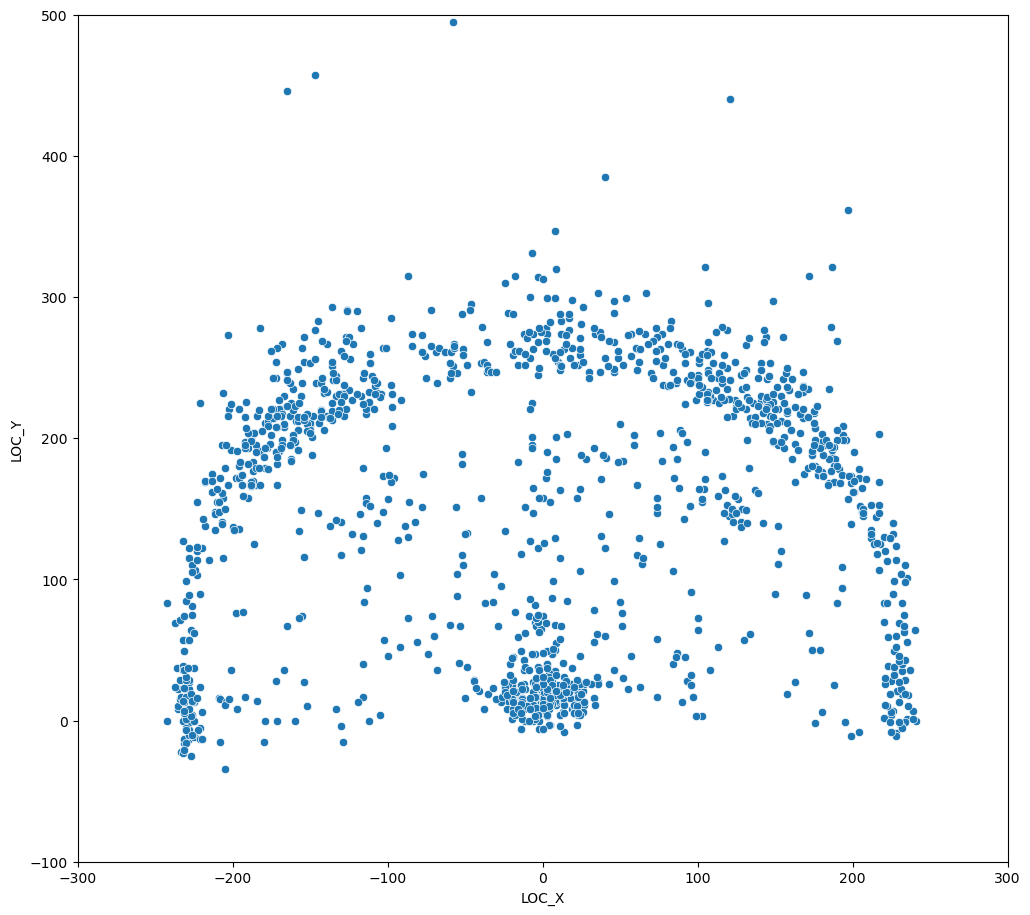

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=[12, 11])
ax2a = sns.scatterplot(data=curry_data,x="LOC_X",y="LOC_Y")

# Set x/y limits and labels
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

Lets add some important context by adding the relevant court lines into our diagram. We will use code from [http://savvastjortjoglou.com/nba-shot-sharts.html](http://savvastjortjoglou.com/nba-shot-sharts.html) to add the court markings to our diagram.  The `draw_court` function below will do this for us.  The below cell will generate an example court.

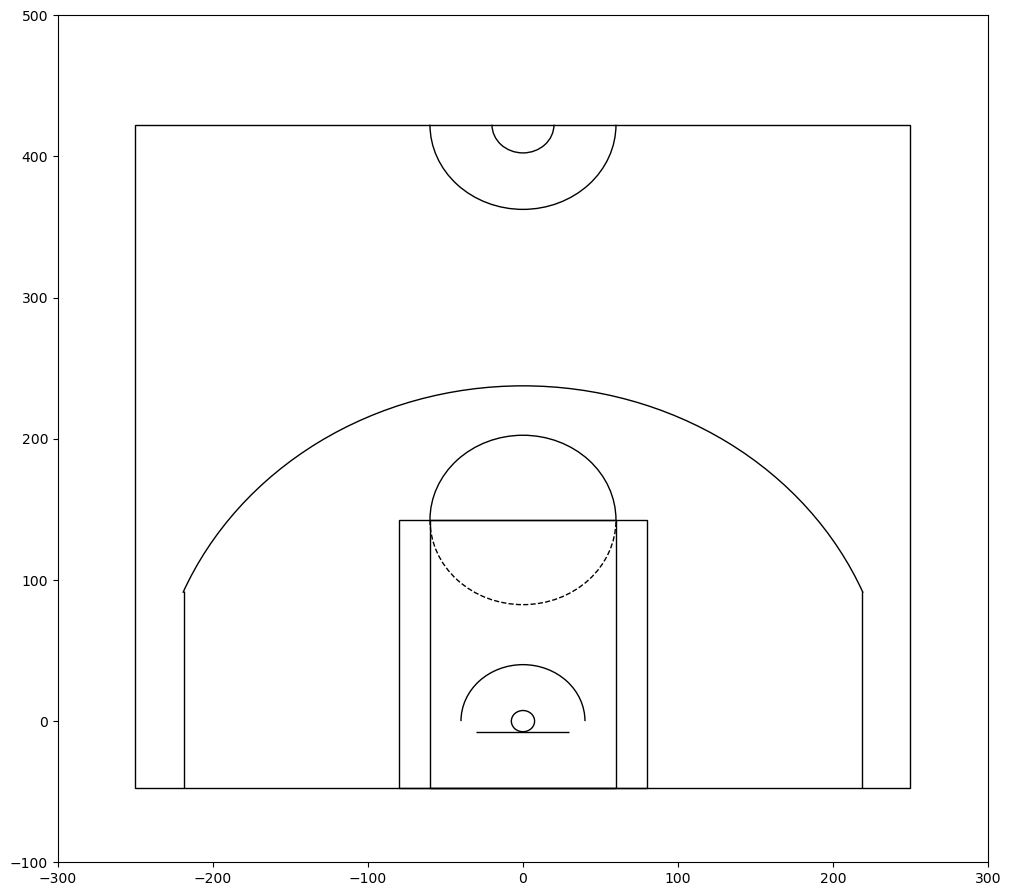

In [28]:
## code is from http://savvastjortjoglou.com/nba-shot-sharts.html
def draw_court(ax=None, color='black', lw=1, outer_lines=False):
    
    from matplotlib.patches import Circle, Rectangle, Arc
    from matplotlib.pyplot import gca
    
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, 0, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-219, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((219, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22.5, theta2=157.5, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half-court line, baseline and side-out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

<!-- BEGIN QUESTION -->

### All Shots Scatter Plot + Court Outline


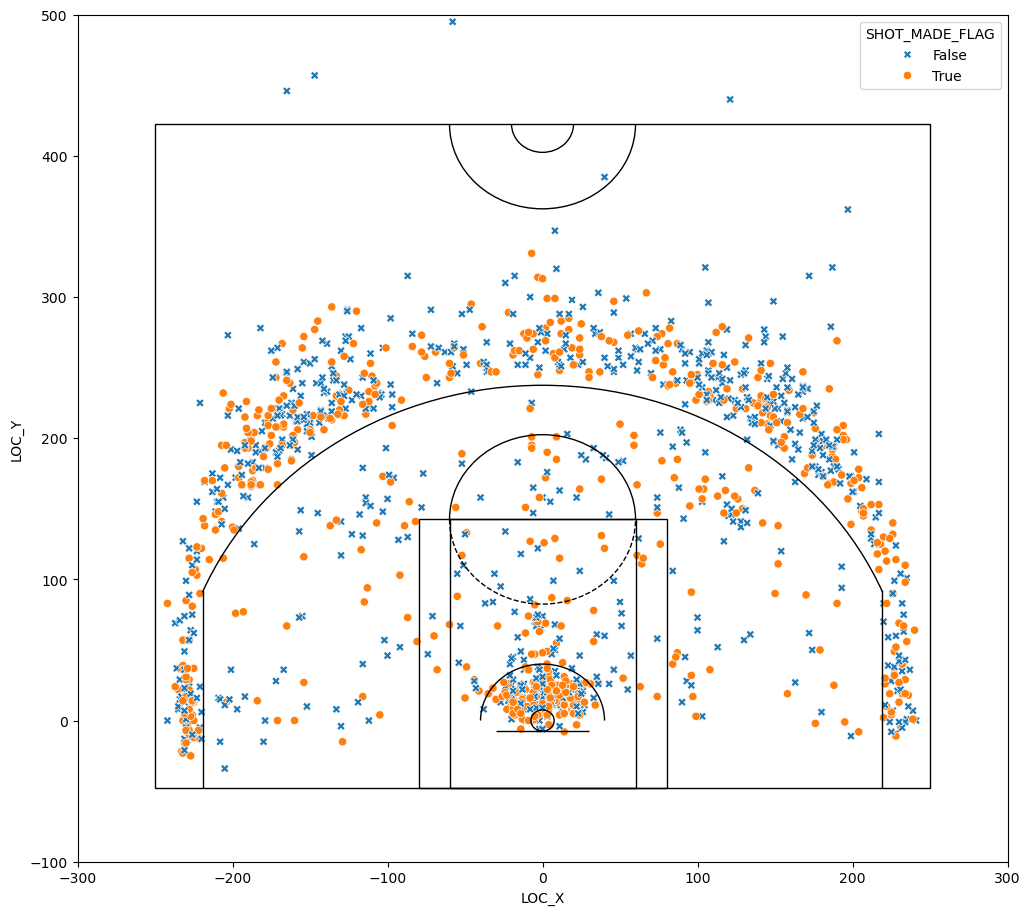

In [29]:
plt.figure(figsize=(12, 11))
markers = {0 : "X", 1 : "o"}
ax = sns.scatterplot(data=curry_data,x="LOC_X",y="LOC_Y",markers=markers,style="SHOT_MADE_FLAG",hue="SHOT_MADE_FLAG")
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)

plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Analyzing the Visualization
This is an effective visualization for understanding the types of shots that Stephen Curry likes to take 
and is good at taking because the plot displays concentrated areas where Curry makes shots (represented by
the orange circles. However, this visualization can be improved by separating areas of the court on different 
plots to gain a clearer understanding of which areas Stephen Curry is more accurate in making shots.

### <!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### A Hexbin plot

Visualizing Stephen Curry's shots by using a [hexbin plot with marginal histograms](https://seaborn.pydata.org/examples/hexbin_marginals.html).

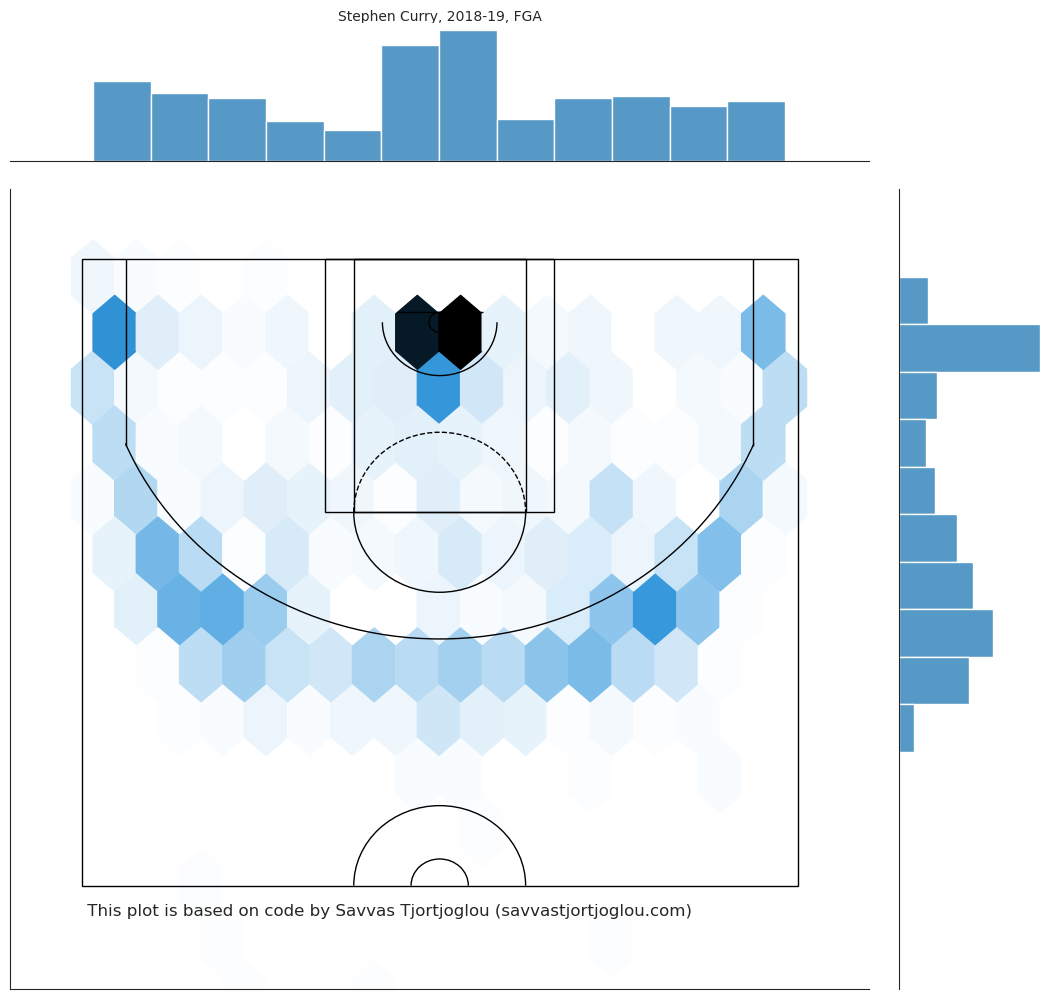

In [30]:
sns.set_style("white")
joint_shot_chart = sns.jointplot(data=curry_data,x="LOC_X",y="LOC_Y",kind="hex")
joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to draw our court onto and adjust some other settings
ax = joint_shot_chart.ax_joint
draw_court(ax, outer_lines=True)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-300, 300)
ax.set_ylim(500, -100)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom=False, labelleft=False)

# Add a title
ax.set_title('Stephen Curry, 2018-19, FGA', 
             y=1.2, fontsize=10)

# Add Data Source and Author
ax.text(-250,445,'\n This plot is based on code by Savvas Tjortjoglou (savvastjortjoglou.com)',
        fontsize=12);

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## A Contour Plot

Another way to visualize Stephen Curry's shots is using contours. We can use `distplot()` for 2D data in `seaborn` to visualize the distribution of missed shots and made shots.

In [31]:
curry_data.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
PLAYER_ID,,,,,,,,,,,,,,,,,,,,,
201939,Shot Chart Detail,0021800862,117,Stephen Curry,1610612744,Golden State Warriors,1,3,55,Made Shot,...,Center(C),16-24 ft.,17,2,172,1,True,20190213,POR,GSW
201939,Shot Chart Detail,0021800862,600,Stephen Curry,1610612744,Golden State Warriors,4,5,9,Missed Shot,...,Right Side Center(RC),24+ ft.,26,116,239,1,False,20190213,POR,GSW
201939,Shot Chart Detail,0021800862,576,Stephen Curry,1610612744,Golden State Warriors,4,6,55,Missed Shot,...,Right Side(R),24+ ft.,22,225,28,1,False,20190213,POR,GSW
201939,Shot Chart Detail,0021800862,484,Stephen Curry,1610612744,Golden State Warriors,3,2,24,Missed Shot,...,Left Side(L),24+ ft.,23,-235,8,1,False,20190213,POR,GSW
201939,Shot Chart Detail,0021800862,467,Stephen Curry,1610612744,Golden State Warriors,3,3,3,Missed Shot,...,Right Side(R),16-24 ft.,22,193,109,1,False,20190213,POR,GSW


/tmp/ipykernel_470/440177921.py:3: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  contour_miss_made= sns.displot(x='LOC_X', y='LOC_Y', data=curry_data, kind='kde', hue='SHOT_MADE_FLAG', col='SHOT_ZONE_AREA', col_wrap=2)


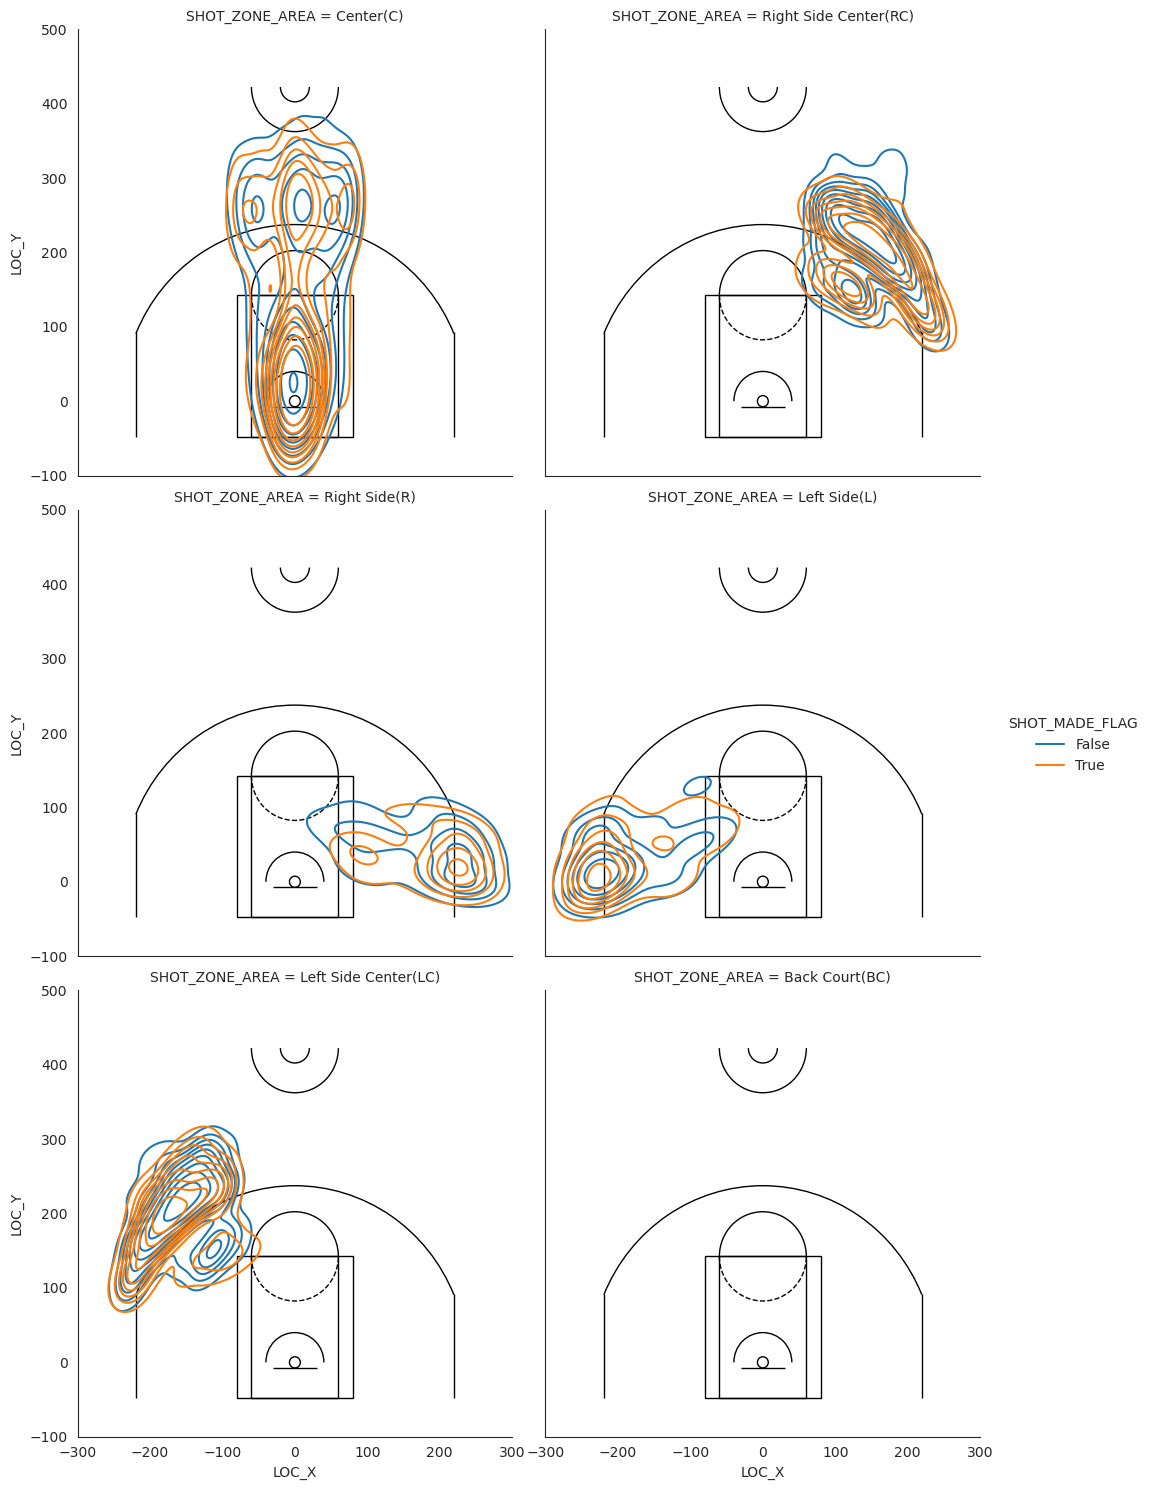

In [32]:
contour_miss_made= sns.displot(x='LOC_X', y='LOC_Y', data=curry_data, kind='kde', hue='SHOT_MADE_FLAG', col='SHOT_ZONE_AREA', col_wrap=2) 
for ax in contour_miss_made.axes.flat:
    ax = draw_court(ax=ax)
    ax.set_xlim(-300,300)
    ax.set_ylim(-100,500)

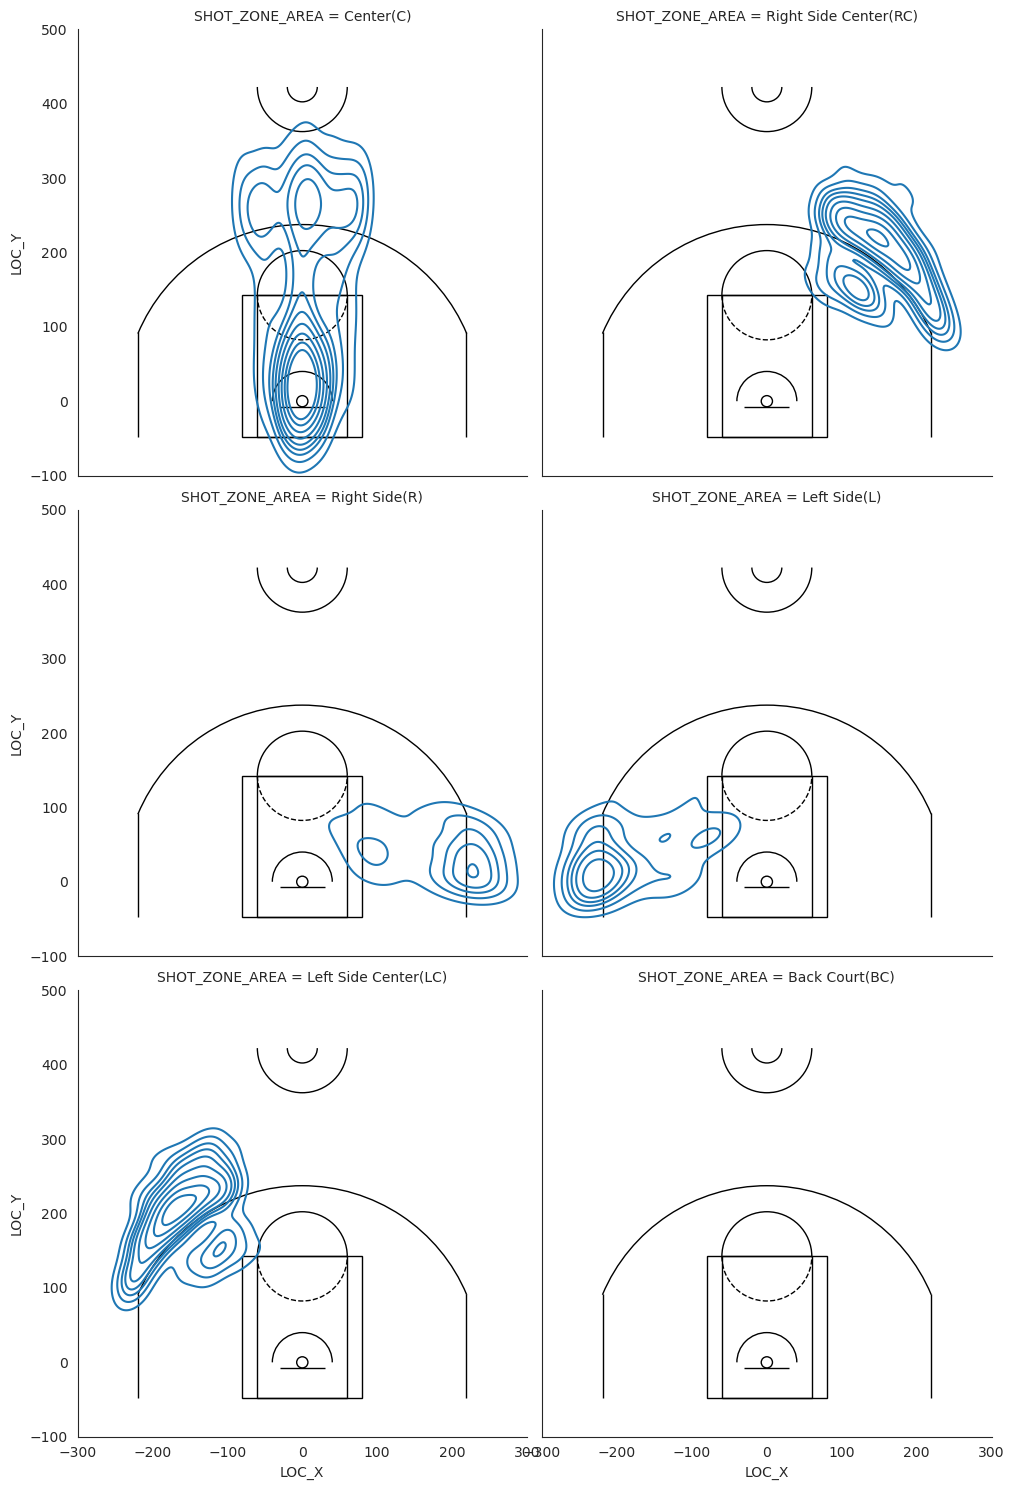

In [33]:
contour_area= sns.displot(x='LOC_X', y='LOC_Y', data=curry_data, kind='kde', legend=False, col='SHOT_ZONE_AREA', col_wrap=2) 
for ax in contour_area.axes.flat:
    ax = draw_court(ax=ax)
    ax.set_xlim(-300,300)
    ax.set_ylim(-100,500)

Some advantages of using contour plots is there a clearer boundary compared with hexibin and scatter plots.
In addition, contour plots are specifically designed for visualizing 2D data. Some disadvantages is that there
may be less detail. Because the contour plots are dependent on the choice of the kernel, it may misrepresent 
the data. 

<!-- END QUESTION -->

## Binning and Smoothing Shots

In this part, we will divide the court into square regions and create a matrix which includes the number of shots taken by a player in that region.  We divide the court up into square bins (i.e. a 2d histogram) and, for each player, count number of shots that fall into each bin. 

### 2D Smoothing

In [34]:
def bin_shots(df, bin_edges, density=False, sigma=1):
    
    """Given data frame of shots, compute a 2d matrix of binned counts is computed
    
    Args:
        df: data frame of shotchartdetail from nba.com. 
            At the minimum, variables named LOCX and LOCY are required.
        bin_edges: bin edge definition: edges in x and edges in y
    
    Returns:
        binned: counts
        xedges: bin edges in X direction
        yedges: bin edges in Y direction
    """
    import numpy as np
    from scipy import ndimage
    
    ## Call np.histogram2d
    binned, xedges, yedges = np.histogram2d(x=df["LOC_X"],y=df["LOC_Y"],bins=(bin_edges))
    
    if density:

        # Recompute 'binned' using "gaussian_filter"
        binned = ndimage.filters.gaussian_filter(binned,sigma=sigma)
        
        # Normalize the histogram to be a "density", e.g. mass across all bins sums to 1.
        binned /= np.sum(binned)
    
    return(binned, xedges, yedges)


<!-- BEGIN QUESTION -->

### Visualize the binning on `curry_data`

In [36]:
## bin edge definitions in inches
xedges = np.linspace(start=-300, stop=300, num=151)
yedges = np.linspace(start=-48, stop=372, num=106)

In [37]:
bin_edges = (xedges, yedges)
curry_binned_unsmoothed  = bin_shots(curry_data, bin_edges, density=False, sigma=0)
curry_binned_smoothed1   = bin_shots(curry_data, bin_edges, density=True, sigma=1)
curry_binned_smoothed5   = bin_shots(curry_data, bin_edges, density=True, sigma=5)

/tmp/ipykernel_470/2168093559.py:24: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  binned = ndimage.filters.gaussian_filter(binned,sigma=sigma)


In [38]:
def plot_shotchart(binned_counts, xedges, yedges, ax=None, use_log=False, cmap = 'Reds'):
    
    """Plots 2d heatmap from vectorized heatmap counts
    
    Args:
        hist_counts: vectorized output of numpy.histogram2d
        xedges, yedges: bin edges in arrays
        ax: figure axes [None]
        use_log: will convert count x to log(x+1) to increase visibility [False]
        cmap: Set the color map https://matplotlib.org/examples/color/colormaps_reference.html
    Returns:
        ax: axes with plot
    """
    
    import numpy as np
    import matplotlib.pyplot as plt
    
    ## number of x and y bins.  
    nx = xedges.size - 1
    ny = yedges.size - 1

    X, Y = np.meshgrid(xedges, yedges)
    
    if use_log:
        counts = np.log(binned_counts + 1)
        
    if ax is None:
        fig, ax = plt.subplots(1,1)
    
    ax.pcolormesh(X, Y, binned_counts.T, cmap=cmap) 
    ax.set_aspect('equal')
    
    draw_court(ax)
    
    return(ax)

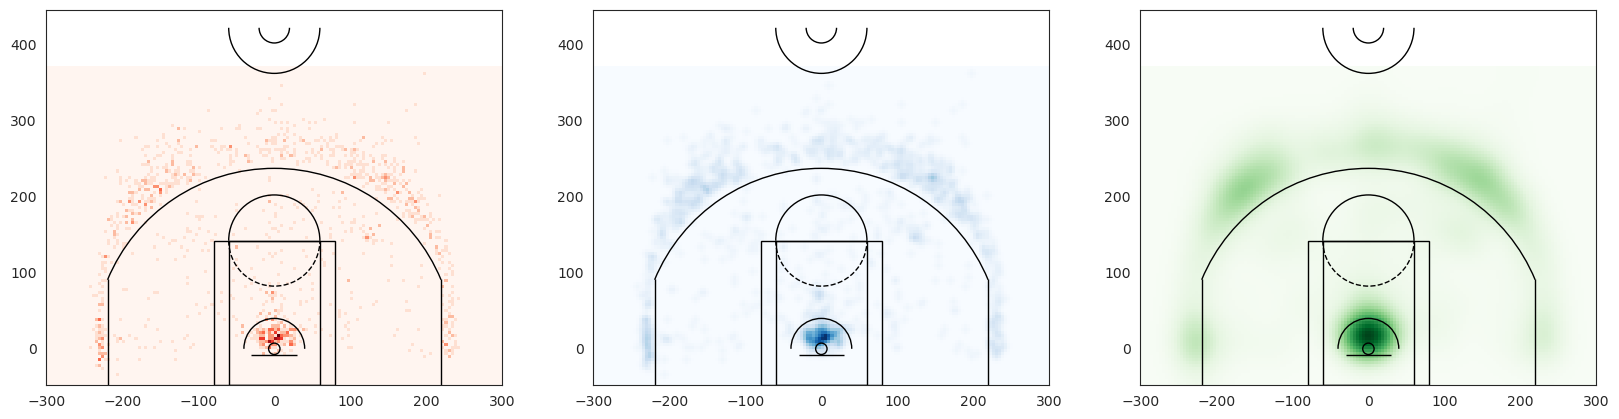

In [39]:
fig, ax = plt.subplots(1, 3, figsize=(20,60))
plot_shotchart(curry_binned_unsmoothed[0], xedges, yedges, ax=ax[0],use_log=False, cmap = 'Reds') 
plot_shotchart(curry_binned_smoothed1[0], xedges, yedges, ax=ax[1],use_log=False, cmap = 'Blues') 
plot_shotchart(curry_binned_smoothed5[0], xedges, yedges, ax=ax[2],use_log=False, cmap = 'Greens')
fig.show()

<!-- END QUESTION -->

### Vectorize Shot Images

In [40]:
## number of bins is one less than number of edges (remember homework 1)
nx = xedges.size - 1
ny = yedges.size - 1

## 2d histogram containers for binned counts and smoothed binned counts
all_counts = []
all_smooth = []
pids = []

## 2d histogram containers for binned counts and smoothed binned counts

## data matrix: players (row) by vectorized 2-d court locations (column)
for i, one in enumerate(allshots.groupby('PLAYER_ID')):
    
    pid, pdf = one
        
    num_shots = len(pdf.index)
    if(num_shots > 100): 
        
        tmp1, xedges, yedges = bin_shots(pdf, bin_edges=(xedges, yedges), density=True, sigma=2)
        tmp2, xedges, yedges = bin_shots(pdf, bin_edges=(xedges, yedges), density=False)
    
        ## vectorize and store into list
        all_smooth += [tmp1.reshape(-1)]
        all_counts += [tmp2.reshape(-1)]
        pids += [pid]
        
X = np.vstack(all_smooth).T
p, n = X.shape

print('Number of shot regions (p):', p)
print('Number of players (n):', n)

/tmp/ipykernel_470/2168093559.py:24: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  binned = ndimage.filters.gaussian_filter(binned,sigma=sigma)


Number of shot regions (p): 15750
Number of players (n): 388


## Non-negative Matrix Factorization (NMF) 

The non-negative matrix factorization is a dimension reduction technique that is often applied to image data. 

The NMF solves the following problem: given some matrix $X$ is $p\times n$ matrix, NMF computes the following factorization:
$$ \min_{W,H} \| X - WH \|_F\\
\text{ subject to } W\geq 0,\ H\geq 0, $$
where $W$ is ${p\times r}$ matrix and $H$ is ${r\times n}$ matrix.

The `sklearn` library is one of the main Python machine learning libraries.

In [41]:
## Non-negative Matrix Factorization
def non_negative_marix_decomp(n_components, array_data):
    import sklearn.decomposition as skld
    model = skld.NMF(n_components=n_components, init='nndsvda', max_iter=500, random_state=0)
    W = model.fit_transform(array_data)
    
    # Normalize basis vectors to sum to 1
    Wsum = W.sum(axis=0)
    W = W/Wsum
    
    ## fix H correspondingly
    H = model.components_
    H = (H.T * Wsum).T

    nmf = (W, H)
    return(nmf)

### Computing NMF Factorization

Compute the NMF on all player's shot charts, X, assuming with `n_components` = 3 (i.e. each shot chart can be represented as a positive linear combination of 3 "basis" shot charts).  

In [42]:
W3, H3 = non_negative_marix_decomp(3,X)

<!-- BEGIN QUESTION -->

### Visualizing Shot Types

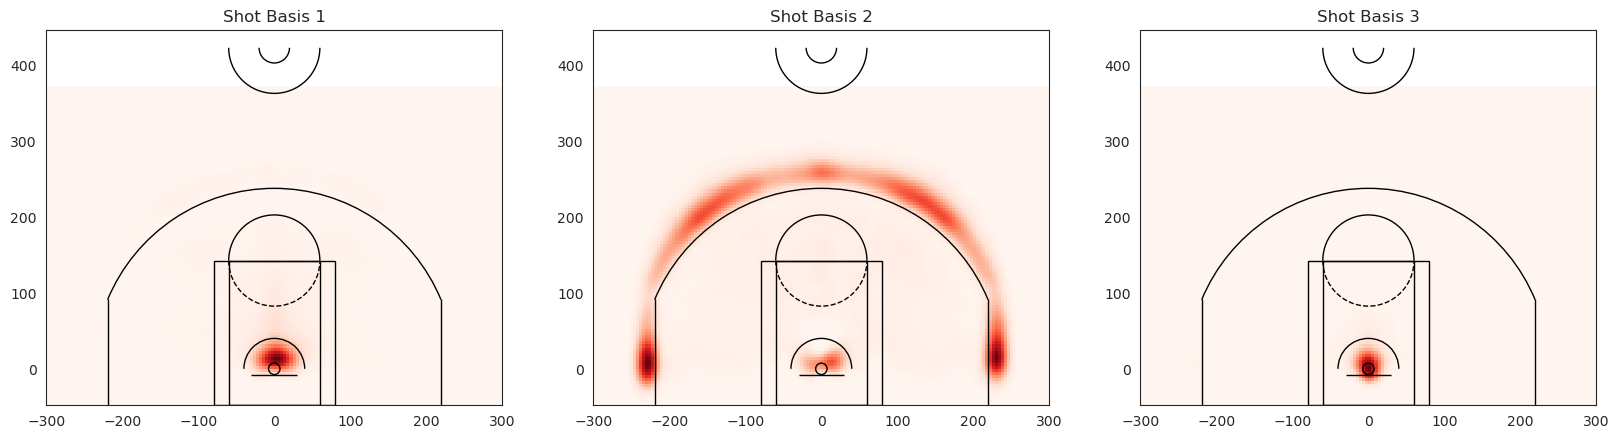

In [44]:
def plot_vectorized_shotchart(vec_counts, xedges, yedges, ax=None, use_log=False, cmap = 'Reds'):
    
    """Plots 2d heatmap from vectorized heatmap counts
    
    Args:
        hist_counts: vectorized output of numpy.histogram2d
        xedges, yedges: bin edges in arrays
        ax: figure axes [None]
        use_log: will convert count x to log(x+1) to increase visibility [False]
        cmap: Set the color map https://matplotlib.org/examples/color/colormaps_reference.html
    Returns:
        ax: axes with plot
    """

    nx = len(xedges)-1
    ny = len(yedges)-1
    
    # use reshape to convert a vectorized counts back into a 2d histogram
    two_d_counts = vec_counts.reshape(nx, ny)
    
    return(plot_shotchart(two_d_counts, xedges, yedges, ax=ax, use_log=use_log, cmap=cmap))

fig, ax = plt.subplots(1, 3, figsize=(20,60))

for i in range(3):
    plot_vectorized_shotchart(W3[:, i], xedges, yedges, use_log=True, ax=ax[i])
    ax[i].set_title('Shot Basis %i' % (i+1))

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Reconstruction Error

In [45]:
X3_hat = W3 @ H3

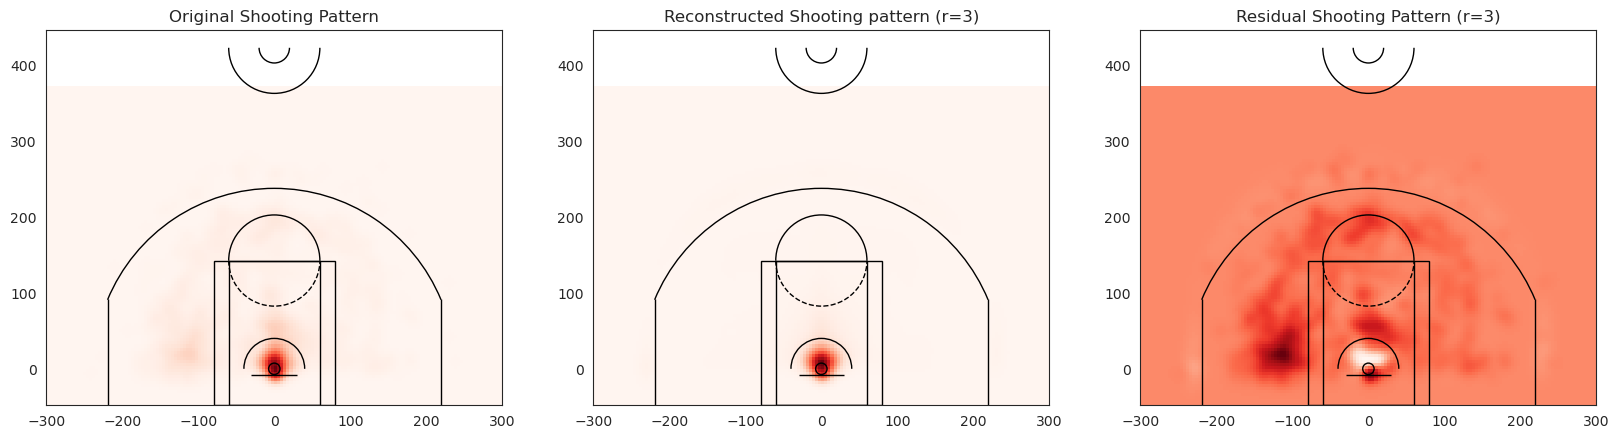

In [46]:
# Find the player_id of LaMarcus Aldridge
player_id = allplayers.query('DISPLAY_LAST_COMMA_FIRST == "Aldridge, LaMarcus"').index.values[0]

## find index in X corresponding to that player
to_plot_idx = np.where(pids == player_id)[0][0]
res = X-X3_hat
fig, ax = plt.subplots(1, 3, figsize=(20,60))

## Call plot_vectorized_shot_chart
original_shotchart = plot_vectorized_shotchart(X[:,to_plot_idx],xedges,yedges,ax = ax[0])
reconstructed_shotchart = plot_vectorized_shotchart(X3_hat[:,to_plot_idx],xedges,yedges, ax = ax[1])
residual_chart = plot_vectorized_shotchart(res[:, to_plot_idx],xedges,yedges,ax = ax[2])

# print(max(abs(X3_hat[:, to_plot_idx] - X[:, to_plot_idx])))
ax[0].set_title('Original Shooting Pattern')
ax[1].set_title('Reconstructed Shooting pattern (r=3)')
ax[2].set_title('Residual Shooting Pattern (r=3)')
fig.show()
None # prevents the title string from showing up as output

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### More Detailed Modeling

Re-run the analysis, this time for 10 basis vectors instead of 3.  Again plot the bases using `plot_vectorized_shotchart` on the columns of `W10`.

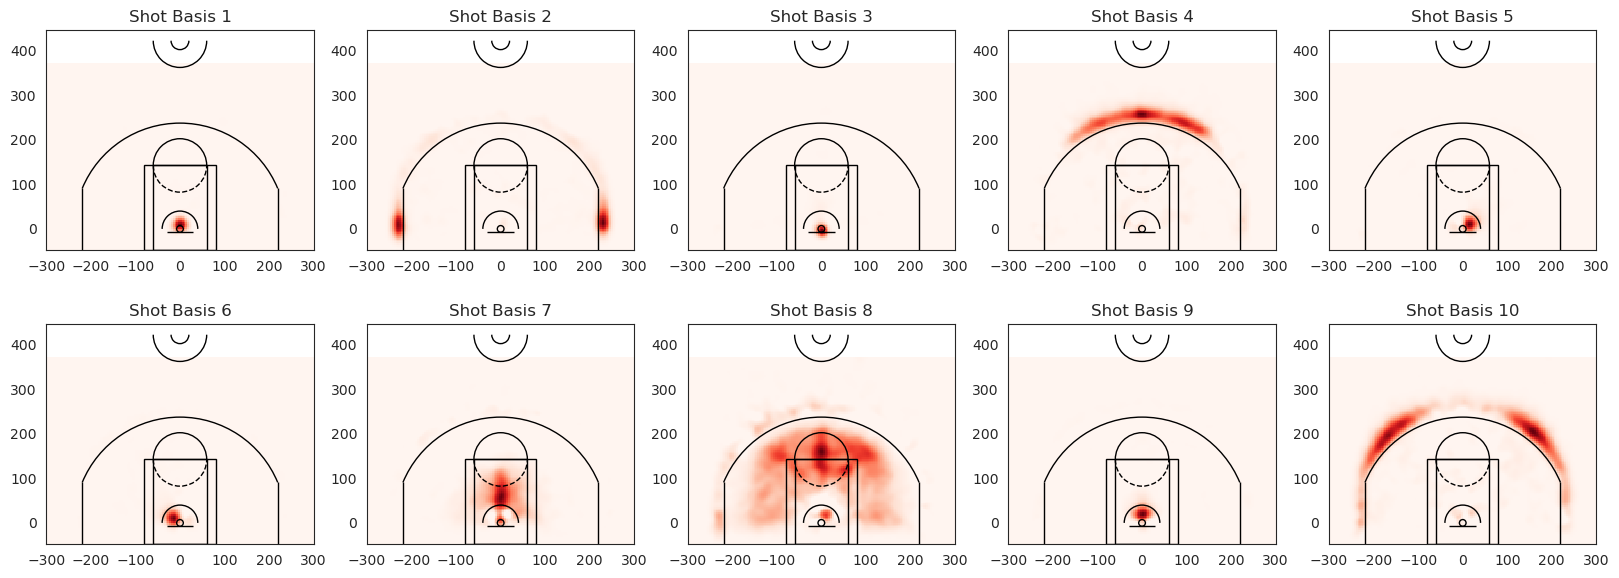

In [47]:
W10, H10 = non_negative_marix_decomp(n_components = 10, array_data = X)

fig, ax = plt.subplots(2, 5, figsize=(20, 7))

## Write a for loop
for i in range(10):
    plot_vectorized_shotchart(W10[:, i], xedges, yedges, ax = ax[i//5, i % 5])
    ax[i//5, i % 5].set_title('Shot Basis %i' % (i+1))


<!-- BEGIN QUESTION -->



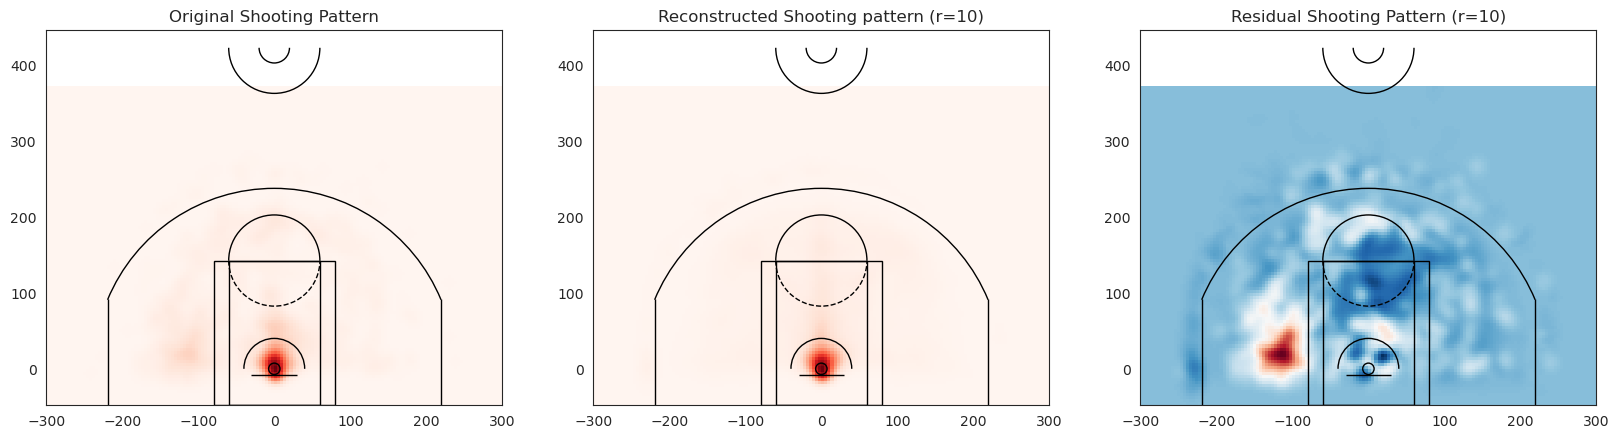

In [48]:
X10_hat = W10 @ H10

fig, ax = plt.subplots(1, 3, figsize=(20,60))

# I took the first player appearing in first column 
# (you probably want to do more interesting players)
original_shotchart = plot_vectorized_shotchart(X[:, to_plot_idx], xedges, yedges, ax=ax[0], cmap = 'Reds')
reconstructed_shotchart =  plot_vectorized_shotchart(X10_hat[:, to_plot_idx], xedges, yedges, ax=ax[1], cmap = 'Reds')
residual_chart = plot_vectorized_shotchart(X10_hat[:, to_plot_idx] - X[:, to_plot_idx], xedges, yedges, ax=ax[2], cmap = 'RdBu')

ax[0].set_title('Original Shooting Pattern')
ax[1].set_title('Reconstructed Shooting pattern (r=10)')
ax[2].set_title('Residual Shooting Pattern (r=10)');

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Comparing Players 

The players with the closest distances are: Brian Grant and Melvin Booker
The players with the furthest distances are: Dickey Simpkins and Aaron McKie


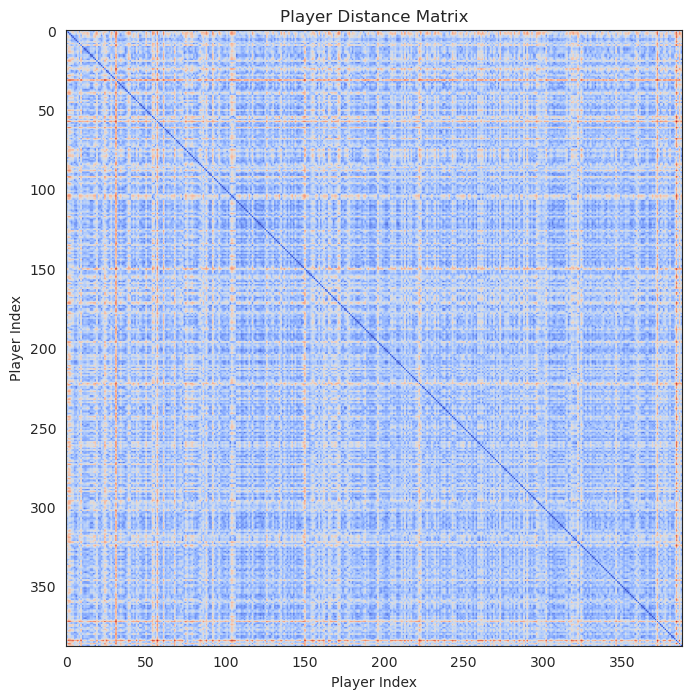

In [49]:
from scipy.spatial.distance import pdist, squareform 
distances = pdist(H10.T)	

# Convert the pairwise distances to a square matrix using squareform()			
distance_matrix = squareform(distances)	

# Create the heatmap					
fig, ax = plt.subplots(figsize=(8, 8))
heatmap = ax.imshow(distance_matrix, cmap='coolwarm')
ax.set_title('Player Distance Matrix')			
ax.set_xlabel('Player Index')
ax.set_ylabel('Player Index')				
						
allplayers_reset = allplayers.reset_index()
np.fill_diagonal(distance_matrix, np.inf)					
closest_index = np.argmin(distance_matrix)				
np.fill_diagonal(distance_matrix, -np.inf)
furthest_index = np.argmax(distance_matrix)			
						
num_players = distance_matrix.shape[0]
closest_player1_id = closest_index // num_players
closest_player2_id = closest_index % num_players
furthest_player1_id = furthest_index // num_players
furthest_player2_id = furthest_index % num_players
					
closest_player1_name = allplayers_reset.loc[closest_player1_id,'DISPLAY_FIRST_LAST']
						
closest_player2_name = allplayers_reset.loc[closest_player2_id,'DISPLAY_FIRST_LAST']
						
furthest_player1_name = allplayers_reset.loc[furthest_player1_id,'DISPLAY_FIRST_LAST']
						
furthest_player2_name = allplayers_reset.loc[furthest_player2_id,'DISPLAY_FIRST_LAST']
						
print("The players with the closest distances are:", closest_player1_name,"and", closest_player2_name)
						
print("The players with the furthest distances are:", furthest_player1_name,"and", furthest_player2_name) 


Two pairs of players with smallest distances are (Malik Beasley, Malik Monk) and (CJ McCollum, Jamal Murray).

Two pairs of players with largest distances are (PJ Tucker, Kyle O'Quinn) and (PJ Tucker, Jose Calderon).

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Residuals


(array([12., 69., 99., 78., 51., 31., 17., 17., 10.,  4.]),
 array([0.00014299, 0.00019843, 0.00025387, 0.00030931, 0.00036475,
        0.00042019, 0.00047563, 0.00053108, 0.00058652, 0.00064196,
        0.0006974 ]),
 <BarContainer object of 10 artists>)

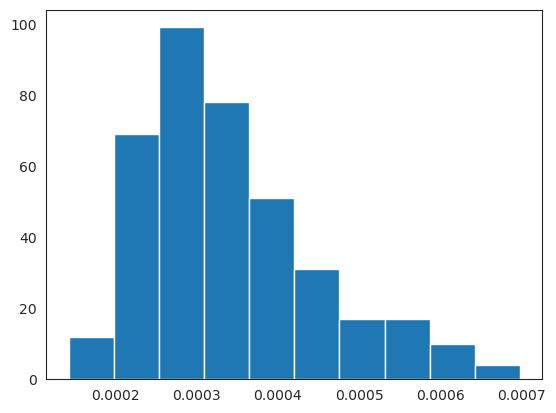

In [50]:
player_rmse = np.zeros(388)
for i in range(388):
    player_rmse[i] = np.sqrt(np.sum((X10_hat[:,i]-X[:,i])**2)/388)
    
player_rmse

np.argmin(player_rmse) #227
np.argmax(player_rmse) #128

pids[227]
allshots[allshots.index  == 1626149] #Montrezl Harrell

pids[128]
allshots[allshots.index  == 202954] #Brad Wanamaker

plt.hist(player_rmse)

From the histogram, we can see that this distribution is skewed to the right. After looking at the RMSEs, I found that the player with the smallest RMSE was Montrezl Harrell and the player with the largest RMSE was Brad Wanamaker.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Proposing improvements

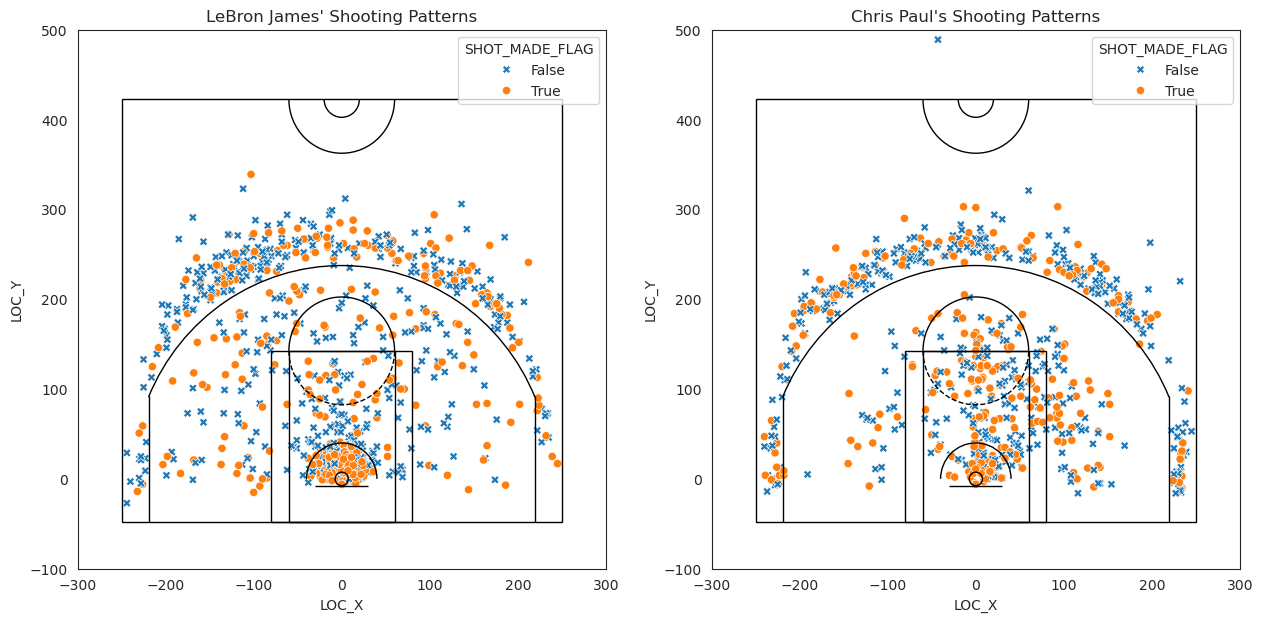

In [53]:
query_str = 'DISPLAY_FIRST_LAST == "LeBron James"'
james_id = str(allplayers.query(query_str).index.values[0])
james_data = allshots.query('PLAYER_ID == ' + str(james_id)).astype({'SHOT_MADE_FLAG' : bool})

fig, ax = plt.subplots(1,2, figsize = (15,7))
markers = {0 : "X", 1 : "o"}
sns.scatterplot(data=james_data,x="LOC_X",y="LOC_Y",
                    hue = "SHOT_MADE_FLAG",
                    style = "SHOT_MADE_FLAG",
                    markers = markers, ax = ax[0])
draw_court(ax[0], outer_lines = True)
ax[0].set_xlim([-300, 300])
ax[0].set_ylim([-100, 500])
ax[0].set_title("LeBron James' Shooting Patterns")

query_str = 'DISPLAY_FIRST_LAST == "Chris Paul"'
paul_id = str(allplayers.query(query_str).index.values[0])
paul_data = allshots.query('PLAYER_ID == ' + str(paul_id)).astype({'SHOT_MADE_FLAG' : bool})

sns.scatterplot(data=paul_data,x="LOC_X",y="LOC_Y",
                    hue = "SHOT_MADE_FLAG",
                    style = "SHOT_MADE_FLAG",
                    markers = markers, ax = ax[1])
draw_court(outer_lines = True)
ax[1].set_xlim([-300, 300])
ax[1].set_ylim([-100, 500])
ax[1].set_title("Chris Paul's Shooting Patterns")

fig.show()

The two players I chose to compare were LeBron James and Chris Paul. Each player has different shot patterns and areas on the court where they make more shots. For example, we can see that LeBron is able to make many more shots all around the court and the plot is very symmetrical. On the other hand, it seems that Chris Paul tends to make most of his shots in the middle of the court or around the edge, and the chart seems to seems to be not as symmetrical. Therefore, if we want a well rounded player who is able to make shots at any given point on the court, I think we should go with LeBron James.